# Instituto Tecnológico y de Estudios Superiores de Monterrey
Maestría en Inteligencia Artificial Aplicada
Ciencia y analítica de datos 
TC4029.10

# Semana 8 Data Analysis con Python 
Modulo 5
Model Evaluation and Refinement

Alumna:
**Adriana Fernanda Jiménez Avalos A01087695**

Profesores:	

Profesor titular: Jobish Vallikavungal

Profesor asistente: Juan Miguel Meza Méndez  

Maestría Virtual, 09 Nov 2022


---




# **Model Evaluation and Refinement** 

---






In [26]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.core.arrays import categorical
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import RocCurveDisplay   


from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import requests, zipfile, io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, RepeatedKFold
import matplotlib.pyplot as plt

In [27]:
import numpy as np 
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection

In [50]:
#usados para modulo 5
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Model Evaluation 


Este nos dice como nuestro modelo actua en el mundo real.

La evaluacion 'in-sample' nos dice que tan bien nuestro modelo ajusta los datos usados para entrenamiento.  Pero esto no nos dice que tan bien el modelo de entrenamiento puede ser usado para prediccion de datos.

Es por eso que se necesita partir la informacion en datos de entrenamiento (In) y datos de prueba o evaluacion (Out)


Usamos los datos de prueba para saber que tan bien nuestro modelo ejecutara en realidad.


Algunos ejemplos pueden ser analizados haciendo la particion de datos en 70% datos de entrenamiento y 30% en datos de prueba/validacion.

Cuando se termina de entrenar el modo se debe de utilizar toda la informacion para entrenar el modelo.

In [ ]:
#funcion que se usa para hacer la particion de datos

#from sklearn.mode_selection import train_test_split

#x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=0.3, random_state=0) #la particion de datos se hace del 30%

#este ejemplo de arriba necesita ciertos paquetes, tambien puede ser usado como se muestra abajo:


In [ ]:
!pip install -U "scikit-learn==0.23.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = list(range(10)) 
print(X) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
y = [x * x for x in X] 
print(y) 

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size =0.75, test_size =0.25, random_state =101)

In [ ]:
print("X_train: ", X_train)
print("y_train: ", y_train)
print("X_test: ", X_test)
print("y_test: ", y_test) 

X_train:  [4, 9, 3, 5, 7, 6, 1]
y_train:  [16, 81, 9, 25, 49, 36, 1]
X_test:  [8, 2, 0]
y_test:  [64, 4, 0]


Usando mas datos de entrenamiento nos puede dar mejor exactitud en el modelo, pero su precision de ejecucion sera menor


Si se usan menos datos de entrenamiento para el modelo y mas para prueba del modelo la exactitud del modelo sera menor pero este tendra buena precision

SOLUCION

Se utiliza cross validation!!!

En este metodo el dataset se separa en grupos iguales (k) y cada grupo se refiere como un doblez (fold) o segmento.

1. Se separan los segmentos, se puede decidir en usar ciertos para entrenamiento y ciertos para prueba. 
2. Ya separados, ahora se repite hasta cada segmento de particion es usado como prueba y como entrenamiento
3. Los resultados finales de promedio son usados para estimar el error de salida

In [ ]:
#forma de usar cross val score, import cross_val_score,
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


In [ ]:
scores= cross_val_score (lasso, X, y, cv=3)
scores

array([0.33150734, 0.08022311, 0.03531764])

La function cross val predict
Nos regresa la prediccion obtenida de cada elemento cuando estaba en el set de prueba

Esta es similar al de cross val score

In [31]:
#lib cross val score

yhat=cross_val_predict(lasso,X,y,cv=3)
yhat

array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
       132.68647979, 128.49511245, 120.76146877, 141.069413  ,
       164.18904498, 182.37394949, 111.04181265, 127.94311443,
       135.0869234 , 162.83066014, 135.3573514 , 157.64516523,
       178.95843326, 163.3919841 , 143.85237903, 144.29748882,
       133.58117218, 124.77928571, 132.90918003, 208.52927   ,
       153.61908967, 154.16616341, 118.95351821, 163.50467541,
       145.89406196, 168.3308101 , 155.87411031, 123.45960148,
       185.70459144, 133.38468582, 117.2789469 , 150.27895019,
       174.1541028 , 160.03235091, 192.31389633, 161.58568256,
       154.2224809 , 119.35517679, 146.15706413, 133.82056934,
       179.68118754, 137.96619936, 146.07788398, 126.77579723,
       123.32101099, 166.26710247, 146.41559964, 161.67261029,
       147.47731459, 138.44595305, 144.85421048, 113.77990664,
       185.54970402, 115.31624749, 142.23672103, 171.07792136,
       132.5394716 , 177.80524864, 116.5616502 , 134.25

# Overfitting, Underfitting and Model Selection


En esta seccion se cubre como seleccionar el mejor grado polinomial y los problemas al usar el ordern incorrecto

Para poder seleccionar el mejor modelo se tiene que seleccionar el mejor polinomio adecuado para proveer un mejor estimado de la funcion yx

y(x) + noise


1) Si intentamos ajustar la funcion con una funcion linear, la linea no es tan compleja para ajustar los datos

y= b0+b1x

Como resultado habra muchos errores, esto se llama underfitting/ subentrenamiento> donde el modelo es muy simple para ajustar los datos.

2) Si aumentamos el modelo por un polinomio de orden mayor puede ayudar pero aun se necesita mas ajuste. (Polinomio grados 2)

3) Si se aumenta el polinomio a un order mas elevado (2 o mayor 20/30/40), esto crea flexibilidad en el modelo. Pero llega un punto que ajusta el ruido en vez de ajustar la funcion.


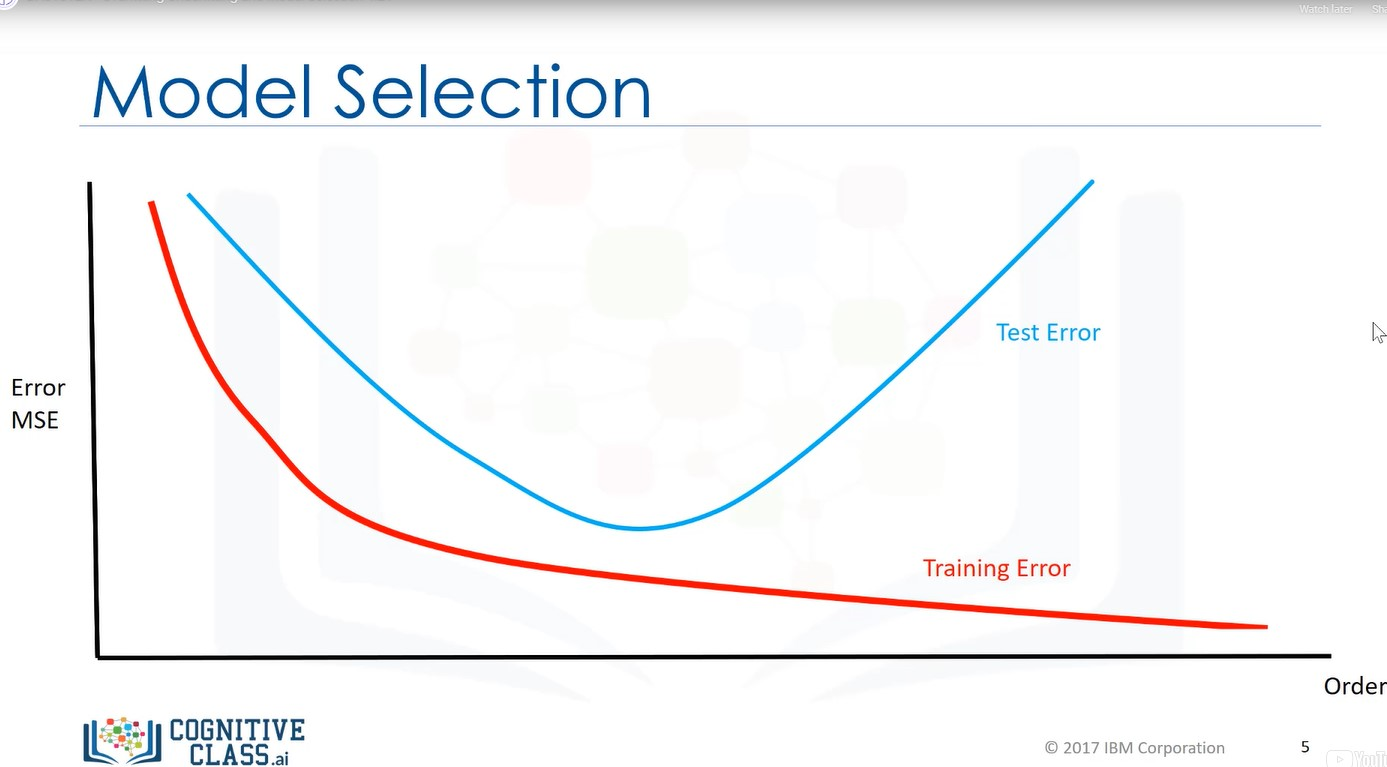

Este grafico nos muestra como se comporta el MSE conformo se agregan grados en el polinomio.

Entre mayor orden polinomial--- menor error MSE para los datos de entrenamiento
Entre mayor orden polinomial---- mayor error MSE al final para los datos de prueba

Viendo el grafico e imaginando una linea en medio de la hiperparabola 

Todo lo del lado izquiero es underfitting/ subentrenamiento


Lado derecho es overfitting/sobreentrenamiento


.....


Aunque seleccionemos el mejor order polinomial, podremos ver algunos errores
Esto es debido a que el ruido actua de manera aleatoria y no puede ser predecido






R-square nos puede ayudar para decir si la suposicion es correcta.

Cuando se tiene R-squared cerca del 1, significa que el modelo es mas exacto

In [43]:
Rsqu_test=[] #se crea lista vacia para recopilar datos
order=[1,2,3,4] # se crea lista con diferentes ordenes de polinomios

for n in order: #se hace iteracion creando el loop
  pr=PolynomialFeatures(degree=n) #se crea el objeto de polinomio con los diferentes orden de polinomio

#  X_train_pr=pr.fit_transform(X_train) #transformamos los datos de entrenamiento en un polinomio usando el metodo de fit

#  X_test_pr= pr.fit_transform(x_test)

#  lr.fit(X_train_pr, X_test_pr) #ahora se ajusta el modelo de regresion usando los datos transformados

#  Rsqu_test.append(lr.score(X_test_pr, y_test)) # se guarda la info en este arreglo

# Ridge Regression 


Previene el overfitting/ sobre entrenamiento,

Es un problema cuando se tienen variables independientes

El metodo de regresion Ridge controla la magnitud de los coeficientes del polinomio introduciendo el parametro ALPHA.


**Alpha se selecciona antes de entrenar o ajustar el modelo

-Si alpha es muy alto los coeficientes pueden tender a cero y hacer underfitting/ subentrenamiento
-Si alpha es cero el sobre entrenamiento es evidente


Para poder hacer uso de alpha se tiene que usar cross-validation

In [46]:
RigeModel= Ridge(alpha=0.1)
RigeModel.fit(X,y)

Yhat=RigeModel.predict(X)

# Grid Search 

Nos permite escanear multiples parametros con pocas lineas de codigo

El termino ALPHA en la regresion Ridge es llamado HIPERPARAMETRO!!!


scikit lean tiene medios para iterar de manera automatica entre estos hiperparametros usando cross-validation llamado GRID SEARCH!

Grid Search

como funciona

1. Toma el modelo u objetos que deseamos entrenar en diferentes valores del hiperparamero
2. Calcula  MSR o R-squared para los varios hiperparametros dejandonos seleccionar los mejores valores
3. Se empieza con un hiperparametro para entrenar el modelo, hasta que se cubren todos.
4. Cada modelo produce un error
5. Se selecciona el hiperparametro que reduce el error.
6. Para seleccionar el hiperparametro se divide el dataset en 3 : 1) entrenamiento 2) validacion 3) prueba
7. Entrenamos el modelo en diferentes hiperparametros. 
8. Se aplica RSM o R-squared para cada modelo
9. Seleccionamos el hiperparametro que minimice MSR o aumente Rsqrt en el set de validacion
10. Finalmente probamos nuestro modelo usando datos de prueba

In [47]:
parameters= [{'alpha':[1,10,100,1000]}]

In [54]:
parameters1= [{'alpha':[0.0001,0.001,0.1,1,10,100,1000,10000,1000000]}]

RR=Ridge() #se crea modelo u objeto Ridge Model

Grid1= GridSearchCV(RR,parameters1,cv=4) #objeto Grid
#Grid1.fit(x_data[['x','y']],y_data) #se ajusta el objeto
#Grid1.best_estimator_ #atributo best estimator

#scores=Grid1.cv_results_ #atributo cv results
#scores['mean_test_score']

Tambien se puede normalizar la informacion


In [53]:
parameters= [{'alpha':[1,10,100,1000], 'normalize':[True,False]}]

# Quiz

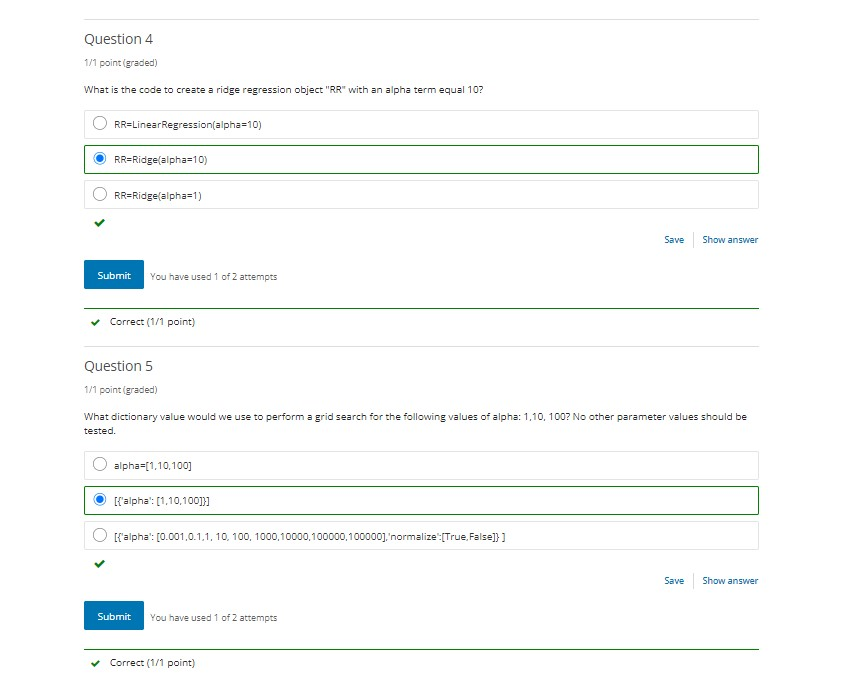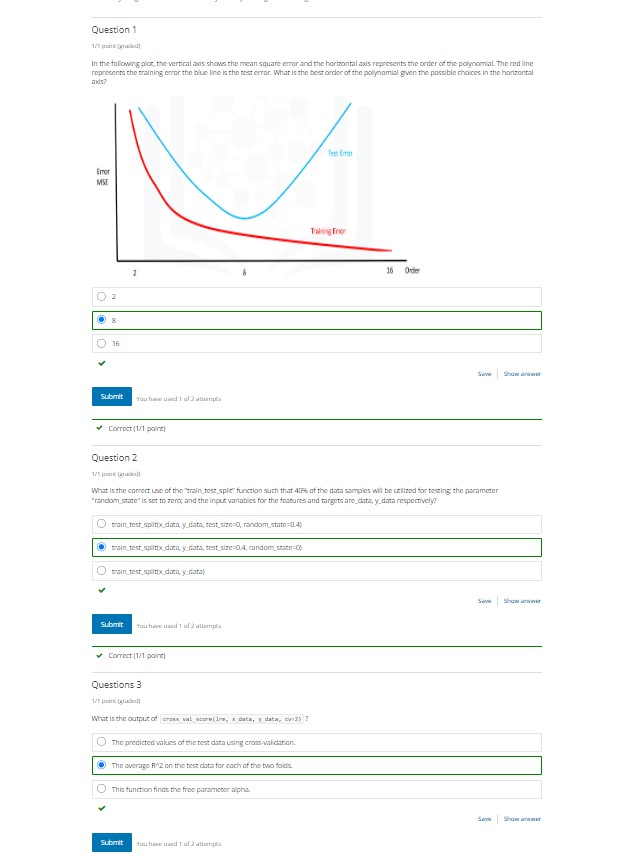